In [26]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [5]:
data = pd.read_csv('data.csv',sep = ',')
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,3,9085,1,1,134.0,1,37,38,...,0,5,8,5,12.600000,0,9.4,-0.8,-3.12,Enrolled
1,1,17,2,9254,1,1,128.0,1,38,38,...,0,6,7,5,14.600000,0,11.1,0.6,2.02,Graduate
2,1,1,1,9070,1,1,125.0,1,1,1,...,0,6,11,4,10.833333,0,13.9,-0.3,0.79,Enrolled
3,1,7,2,9085,1,3,130.0,1,3,3,...,0,4,10,0,0.000000,4,10.8,1.4,1.74,Dropout
4,1,1,2,9500,1,1,135.0,1,37,1,...,0,8,12,7,11.721429,0,12.7,3.7,-1.70,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
3920,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
3921,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
3922,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [29]:
X = data.drop('Target', axis=1).values
y = data['Target'].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [33]:
label_encoder

LabelEncoder()

In [34]:
y

array(['Enrolled', 'Graduate', 'Enrolled', ..., 'Dropout', 'Graduate',
       'Graduate'], dtype=object)

In [55]:
y_encoded

array([1, 2, 1, ..., 0, 2, 2])

In [54]:
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=3) 
y_one_hot


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=24)


In [81]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=40, verbose=1, validation_data=(X_test, y_test))



Epoch 1/200
79/79 [==============================] - 0s 2ms/step - loss: 332.1729 - accuracy: 0.3966 - val_loss: 9.2871 - val_accuracy: 0.2357
Epoch 2/200
79/79 [==============================] - 0s 792us/step - loss: 6.3358 - accuracy: 0.4317 - val_loss: 4.0396 - val_accuracy: 0.3898
Epoch 3/200
79/79 [==============================] - 0s 782us/step - loss: 3.5713 - accuracy: 0.4954 - val_loss: 2.4023 - val_accuracy: 0.6051
Epoch 4/200
79/79 [==============================] - 0s 801us/step - loss: 2.3600 - accuracy: 0.5569 - val_loss: 1.8546 - val_accuracy: 0.6459
Epoch 5/200
79/79 [==============================] - 0s 797us/step - loss: 2.7357 - accuracy: 0.5623 - val_loss: 2.0350 - val_accuracy: 0.4255
Epoch 6/200
79/79 [==============================] - 0s 782us/step - loss: 1.9134 - accuracy: 0.5970 - val_loss: 1.3112 - val_accuracy: 0.6153
Epoch 7/200
79/79 [==============================] - 0s 778us/step - loss: 2.3641 - accuracy: 0.5699 - val_loss: 2.8067 - val_accuracy: 0.6892

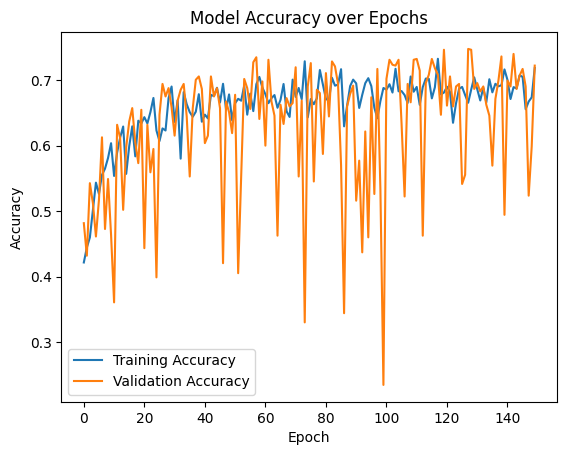

In [64]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()